In [1]:
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

np.random.seed(0)

## 1. Data Processing

The first task is to load and process the dataset. We have loaded the dataset for you. `X` is the design matrix with a shape of `(20640, 8)`, and the target vector `y` has a shape of `(20640,)`. The number of rows represents the number of examples in the dataset, and the number of columns in `X` represents the number of features per example. An entire row of `X` is called a **feature vector**.

### 1.1 Load the California Housing Dataset

We will use the `fetch_california_housing` dataset from `sklearn`. The cell below loads the dataset and displays the feature names.

### 1.2 Data Preprocessing

To evaluate the performance of our linear regression model, we need to split the data into a **training set** and a **test set**. We will:
- Learn the model on the training set.
- Test the model on the test set.

#### Bias Trick:
As in the PLA algorithm, we will take advantage of the **bias trick** by adding a column of ones to the feature matrix.

#### Normalization:
Since the features in the dataset have different ranges, we need to normalize the data. The normalization is performed using the following formula:

$$
x = \frac{x - \mu}{\sigma}
$$

Where:
- $ \mu $ is the mean of each feature.
- $ \sigma $ is the standard deviation of each feature.

**Note:** The normalization parameters $ \mu $ and $ \sigma $ are computed **only from the training set** and then used to normalize both the training and test sets.

#### Steps:
- Split the dataset into training and test sets.
- Normalize the data based on the training set.
- Add a bias term (a column of ones) to the design


In [2]:
# load boston housing price dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target
feature_names = housing.feature_names

print(f'The dataset has {X.shape[0]} samples and {X.shape[1]} features')

The dataset has 20640 samples and 8 features


In [3]:
# dispalay the min max value of each feature
for i in range(X.shape[1]):
    print(f"{feature_names[i]}: min={np.min(X[:, i])}, max={np.max(X[:, i])}")

MedInc: min=0.4999, max=15.0001
HouseAge: min=1.0, max=52.0
AveRooms: min=0.8461538461538461, max=141.9090909090909
AveBedrms: min=0.3333333333333333, max=34.06666666666667
Population: min=3.0, max=35682.0
AveOccup: min=0.6923076923076923, max=1243.3333333333333
Latitude: min=32.54, max=41.95
Longitude: min=-124.35, max=-114.31


In [4]:
def add_intercept(X):
    #Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #Output: X: a numpy array of shape (N, D+1), where a column of ones is concatenated to the input array X

    ########## Your code goes here ##########

    X = np.hstack((X, np.ones((X.shape[0], 1))))

    #########################################

    return X


def normalize(X, mean=None, std=None):
    # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #        mean: a numpy array of shape (D,) containing the mean of each feature
    #        std: a numpy array of shape (D,) containing the standard deviation of each feature
    # Output: X: a numpy array of shape (N, D), where each feature is normalized by subtracting the mean and dividing by the standard deviation

    ########## Your code goes here ##########

    X = (X - mean) / std

    #########################################

    return X


def split_data(X, y, ratio=0.8):
    # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #        y: a numpy array of shape (N,), containing the target for each sample
    #        ratio: a float number between 0 and 1, representing the ratio of training data
    # Output: X_train: a numpy array of shape (N_train, D), containing the training data
    #         y_train: a numpy array of shape (N_train,), containing the target for each training sample
    #         X_test: a numpy array of shape (N_test, D), containing the testing data
    #         y_test: a numpy array of shape (N_test,), containing the target for each testing sample

    X_train, y_train, X_test, y_test = None, None, None, None
    num_samples = None

    ########## Your code goes here ##########

    X_train = X[:int(ratio * X.shape[0])]
    X_test = X[int(ratio * X.shape[0]):]
    y_train = y[:int(ratio * y.shape[0])]
    y_test = y[int(ratio * y.shape[0]):]

    #########################################

    return X_train, y_train, X_test, y_test


def prepocess_data(X, y, ratio=0.8):
    # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #        y: a numpy array of shape (N,), containing the target for each sample
    #        ratio: a float number between 0 and 1, representing the ratio of training data
    # Output: X_train: a numpy array of shape (N_train, D+1), containing the training data
    #         y_train: a numpy array of shape (N_train,), containing the target for each training sample
    #         X_test: a numpy array of shape (N_test, D+1), containing the testing data
    #         y_test: a numpy array of shape (N_test,), containing the target for each testing sample

    X_train, y_train, X_test, y_test = None, None, None, None

    ########## Your code goes here ##########

    # Split the data

    X_train, y_train, X_test, y_test = split_data(X, y, ratio)

    # Compute the mean and std of the training data

    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)

    # Normalize the training data

    X_train = normalize(X_train, mean, std)

    # Add intercept to both training and testing data

    X_train = add_intercept(X_train)
    X_test = add_intercept(X_test)

    ########## Your code goes here ##########

    return X_train, y_train, X_test, y_test

In [5]:
# Run preprocessing on the data
X_train, y_train, X_test, y_test = prepocess_data(X, y)

print('The shape of the training set is:')
print(X_train.shape, y_train.shape)
print('The shape of the test set is:')
print(X_test.shape, y_test.shape)


The shape of the training set is:
(16512, 9) (16512,)
The shape of the test set is:
(4128, 9) (4128,)


## 2. Prediction and Loss Implementation

Before proceeding with the optimization process, we need to implement two important functions:

1. **Prediction Function**: This function will take one or more examples as input and return the corresponding linear predictions.
2. **Loss Function**: This function will compute the average loss (or cost) for one or more examples using the cost function from the lab notes.

### 2.1 Predict Function

The **predict** function will take the weight vector `w` and the input `X` (which could be a single example or multiple examples) and return the predicted output using the linear regression model.

### 2.2 Compute Loss Function

The **compute_loss** function will compute the **loss** for the given input `X` and targets `y` based on the model’s predictions. Pne thing that we did not mention in the lab is that for batch gradient descent we will compute 

#### Steps:
- Implement the `predict` function to return linear predictions.
- Implement the `compute_loss` function to compute the error for one or more examples.


In [6]:
def predict(X, w):
    # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #        w: a numpy array of shape (D,), containing the weights of the linear model
    # Output: pred: a numpy array of shape (N,), containing the predicted values for the input data

    pred = None

    ########## Your code goes here ##########
    
    pred = X @ w

    #########################################

    return pred


def compute_loss(X, y, w):
    # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #        y: a numpy array of shape (N,), containing the target for each sample
    #        w: a numpy array of shape (D,), containing the weights of the linear model
    # Output: loss: a float number representing the average loss

    loss = None

    ########## Your code goes here ##########
    # Squared Error Loss Function
    
    loss = np.sum((predict(X, w) - y) ** 2) / 2

    #########################################

    return loss


## 3 Gradient Descent Optimization

We will optimize the model parameters using gradient descent. We will implement two variants:
- **Stochastic Gradient Descent (SGD)**: Updates the model after each training example.
- **Batch Gradient Descent**: Updates the model after processing the entire dataset in each iteration.

### 3.1 compute_gradient_single

This function computes the gradient of the loss function with respect to the weights for a single training example. (vectorize to and compute the gradient vector at once)

### 3.2 train_stochastic

This function iterates over the training set and updates the weights after each example using SGD. It will return the optimized parameters and a list of all loss values after each update.

### 3.3 compute_gradient_batch

This function computes the gradient of the loss function with respect to the weights for the entire dataset. You can vectorize such that you can compute the gradient with respect to the entire dataset. Hint: Think what happens when you multiple a transpose of a matrix with another one. (X.T @ ....)

### 3.4 train_batch

This function implements batch gradient descent. The model is updated after processing the entire dataset in each iteration. Hint: This is already processed in compute_gradient_batch


In [13]:
def compute_gradient_single(x_i, y_i, w):
    grad = None

    ########## Your code goes here ##########
    
    grad = (predict(x_i, w) - y_i) * x_i

    #########################################

    return grad


def compute_gradient_batch(X, y, w):
    grad = None

    ########## Your code goes here ##########
    
    grad = X.T @ (predict(X, w) - y)

    #########################################

    return grad


def train_stochastic(X, y, w, alpha, no_iterations):
    # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #        y: a numpy array of shape (N,), containing the target for each sample
    #        w: a numpy array of shape (D,), containing the weights of the linear model
    #        alpha: a float number representing the learning rate
    #        no_iterations: an integer representing the number of iterations
    # Output: w: a numpy array of shape (D,), the weights of the trained linear model
    #         losses: a list of floats containing the loss at each update

    losses = []
    
    ########## Your code goes here ##########
    
    for _ in range(no_iterations):
        for i in range(X.shape[0]):
            grad = compute_gradient_single(X[i], y[i], w)
            w = w - alpha * grad
        losses.append(compute_loss(X, y, w))

    #########################################

    return w, losses


def train_batch(X, y, w, alpha, no_iterations):
    # Input: X: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #        y: a numpy array of shape (N,), containing the target for each sample
    #        w: a numpy array of shape (D,), containing the weights of the linear model
    #        alpha: a float number representing the learning rate
    #        no_iterations: an integer representing the number of iterations
    # Output: w: a numpy array of shape (D,), the weights of the trained linear model
    #         losses: a list of floats containing the loss at each update

    losses = []

    ########## Your code goes here ##########

    for step in range(no_iterations):
        grad = compute_gradient_batch(X,y,w)
        w = w - alpha * grad
        losses.append(compute_loss(X, y, w))

    #########################################

    return w, losses


def test(X, y, w):
    loss = None

    ########## Your code goes here ##########
    
    loss = compute_loss(X, y, w)

    ######################################### 

    return loss

Stochastic Gradient Descent loss on test: 6576475.312928646
Batch Gradient Descent loss on test: 15681026.322145028


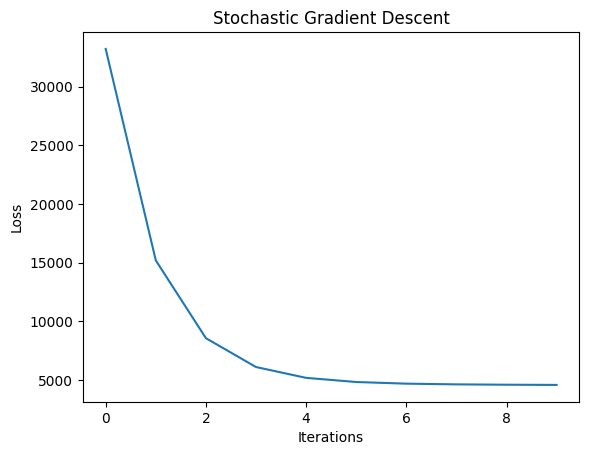

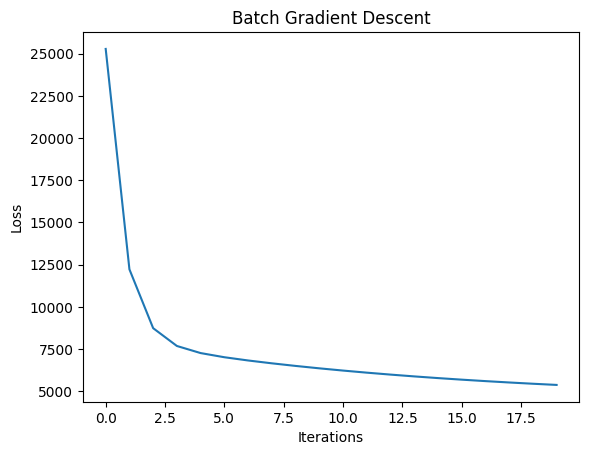

In [14]:
### Let's train and test our models

w_stochastic = np.random.randn(X_train.shape[1])
w_batch = np.random.randn(X_train.shape[1])
alpha = 0.00003

w_stochastic, losses_stochastic = train_stochastic(X_train, y_train, w_stochastic, alpha, no_iterations=10)

w_batch, losses_batch = train_batch(X_train, y_train, w_batch, alpha, no_iterations=20)

loss_stochastic = test(X_test, y_test, w_stochastic)
loss_batch = test(X_test, y_test, w_batch)

print(f'Stochastic Gradient Descent loss on test: {loss_stochastic}')
print(f'Batch Gradient Descent loss on test: {loss_batch}')

#Plot side by side the losses of the two algorithms should be 2 difffetn figures
plt.figure()
plt.plot(losses_stochastic)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Stochastic Gradient Descent')
plt.show()

plt.figure()
plt.plot(losses_batch)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Batch Gradient Descent')
plt.show()

### 3.5 Loss value explainability. 

The loss in this setup does not provide much insight into how the model is performing because it is the sum of all the losses on the test set. To better understand the model's performance on average, we should normalize the loss with respect to the number of test examples it was computed on.

After normalization, we can observe that the error is more meaningful, and the model appears to be performing well, as it has a relatively small squared error.

Stochastic Gradient Descent loss on test: 1593.138399449769
Batch Gradient Descent loss on test: 0.3859346897891882


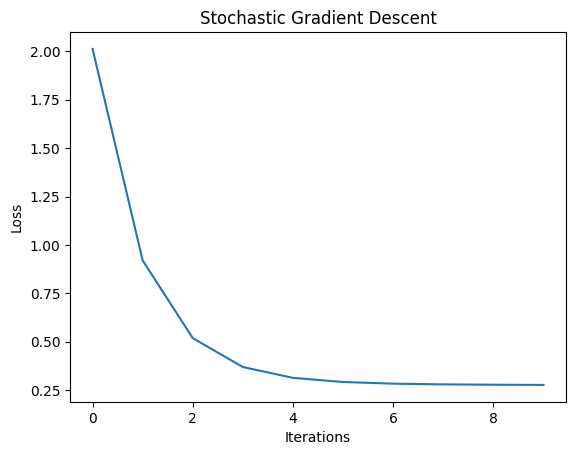

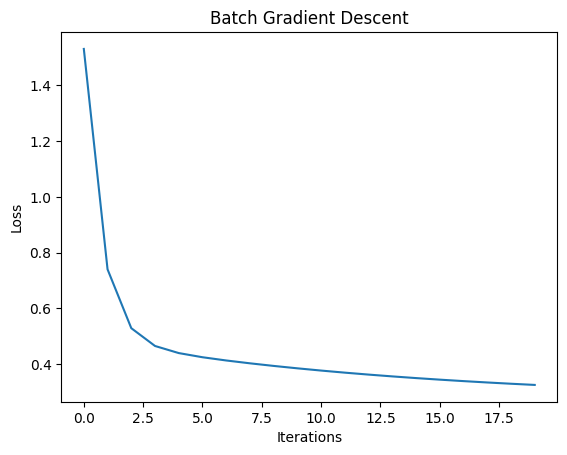

In [15]:
#for each loss in the array losses_stochastic, divide it by the number of samples in the training set
losses_stochastic = [loss / X_train.shape[0] for loss in losses_stochastic]
#for each loss in the array losses_batch, divide it by the number of samples in the training set
losses_batch = [loss / X_train.shape[0] for loss in losses_batch]

loss_stochastic = loss_stochastic / X_test.shape[0]
loss_batch = loss_stochastic / X_test.shape[0]

print(f'Stochastic Gradient Descent loss on test: {loss_stochastic}')
print(f'Batch Gradient Descent loss on test: {loss_batch}')

#Plot side by side the losses of the two algorithms should be 2 difffetn figures
plt.figure()
plt.plot(losses_stochastic)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Stochastic Gradient Descent')
plt.show()

plt.figure()
plt.plot(losses_batch)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Batch Gradient Descent')
plt.show()

## 4 Learning rate parameter tunning

Perform the following experiments where we have changed the values of the learning rate. Analyze the results and answer or revise Question 3 from the lab work. Explain the differences between the behavior of each learning process.

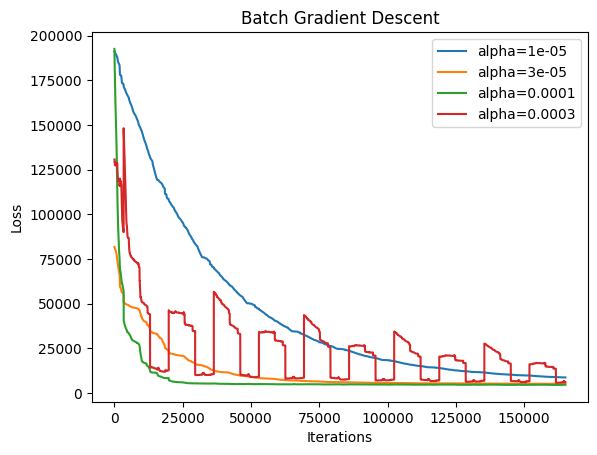

In [10]:
# run train with different learning rates
alpha = [0.00001, 0.00003, 0.0001, 0.0003]

losses_viz = []

for a in alpha:
    w = np.random.randn(X_train.shape[1])
    w, loss_i = train_stochastic(X_train, y_train, w, a, no_iterations=10)
    losses_viz.append(loss_i)
    loss = test(X_test, y_test, w)

#plot the losses
plt.figure()
for i in range(len(alpha)):
    plt.plot(losses_viz[i], label=f'alpha={alpha[i]}')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Batch Gradient Descent')
plt.legend()
plt.show()


## 5. Closed Form Solution

Lastly, we would like to learn the logistic regression parameters using the closed-form solution. Since we already have the `predict` and `test` methods, we just need to implement the learning method.

Your task is to implement the `get_closed_form_solution` function to obtain the desired weights, using the closed-form formula provided in the lab notes.

In [11]:
def get_closed_form_solution(X_train, y_train):
    # Input: X_train: a numpy array of shape (N, D), where N is the number of samples and D is the number of features
    #        y_train: a numpy array of shape (N,), containing the target for each sample
    # Output: w: a numpy array of shape (D,), the weights of the trained linear model

    ########## Your code goes here ##########
    
    w = np.linalg.inv((X_train.T @ X_train)) @ X_train.T @ y_train

    #########################################

    return w


w_closed_form = get_closed_form_solution(X_train, y_train)
y_pred = predict(X_test, w_closed_form)
loss = test(X_test, y_test, w_closed_form) / X_test.shape[0]

print(f'Closed form solution loss on test: {loss}')

Closed form solution loss on test: 2457.881641387638


### 6. Weights Analysis

One of the advantages of linear models is their interpretability once they are trained. Each weight corresponds to a specific feature, and its value reflects the strength and direction of that feature's influence on the model.

Now, examine the values of each weight with respect to the feature it represents. Intuitively, explain why those values make sense in the context of the housing price data.


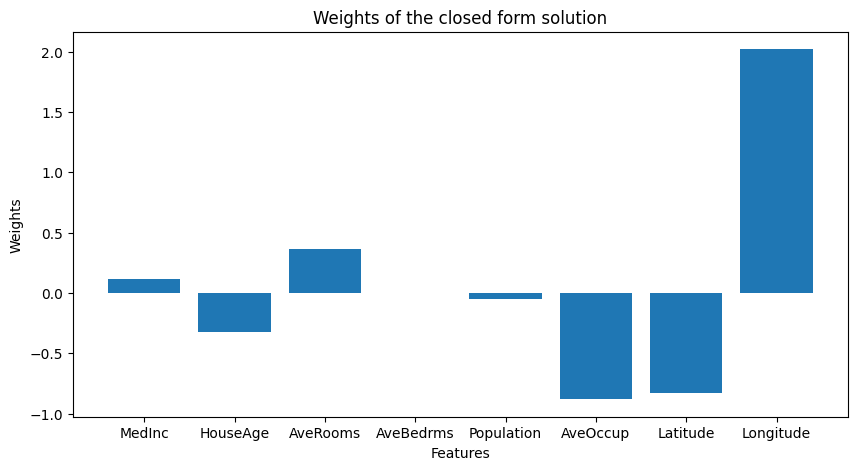

In [12]:


plt.figure(figsize=(10, 5))
plt.bar(feature_names, w_closed_form[1:])
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Weights of the closed form solution')
plt.show()